In [62]:
import os
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from schechter import schechter, named_schechter

In [63]:
fpath = os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_ddp_n8.fits'

dat = fitsio.read(fpath)
dat = Table(dat)

In [64]:
dat['PHI'] = named_schechter(dat['MCOLOR_0P0'], named_type='TMR', zz=None, evolve=False)
# (rho - rho_bar) / rho
dat['RHO_DDP1'] = dat['DDP1_N8'] / dat['FILLFACTOR'] / ( (4./3) * np.pi * 8.**3 )
dat['RHO_DDP2'] = dat['DDP2_N8'] / dat['FILLFACTOR'] / ( (4./3) * np.pi * 8.**3 )
dat['RHO_DDP3'] = dat['DDP3_N8'] / dat['FILLFACTOR'] / ( (4./3) * np.pi * 8.**3 )

rho_bar_DDP1 = 0.005383528919866882 #len(DDP1) / area_DDP1
rho_bar_DDP2 = 0.009928035902084674 #len(DDP2) / area_DDP2
rho_bar_DDP3 = 0.018396185892331243 #len(DDP3) / area_DDP3

dat['DELTA8_DDP1'] = ((dat['RHO_DDP1'] - rho_bar_DDP1) / rho_bar_DDP1)
dat['DELTA8_DDP2'] = ((dat['RHO_DDP2'] - rho_bar_DDP2) / rho_bar_DDP2)
dat['DELTA8_DDP3'] = ((dat['RHO_DDP3'] - rho_bar_DDP3) / rho_bar_DDP3)

In [65]:
DDP1 = dat[dat['DDP'][:,0] == 1]
DDP2 = dat[dat['DDP'][:,1] == 1]
DDP3 = dat[dat['DDP'][:,2] == 1]

In [ ]:
dat['PHI_DDP1_D8'] = named_schechter(dat['MCOLOR_0P0'], named_type='TMR', zz=None, evolve=False)
dat['PHI_DDP1_D8'] = named_schechter(dat['MCOLOR_0P0'], named_type='TMR', zz=None, evolve=False)

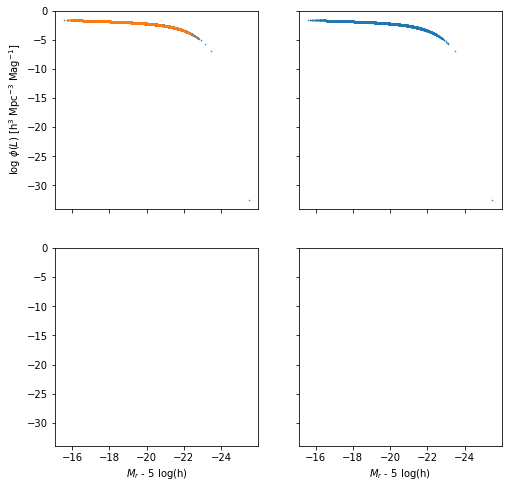

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)
ax[0,0].scatter(dat[dat['DELTA8_DDP1'] < -0.75]['MCOLOR_0P0'], np.log10(dat[dat['DELTA8_DDP1'] < -0.75]['PHI']), s=0.25)
ax[0,0].scatter(dat[(dat['DELTA8_DDP1'] < -0) & (dat['DELTA8_DDP1'] > -0.4)]['MCOLOR_0P0'], np.log10(dat[(dat['DELTA8_DDP1'] < -0) & (dat['DELTA8_DDP1'] > -0.4)]['PHI']), s=0.25)

ax[0,1].scatter(dat[dat['DELTA8_DDP2'] < -0.75]['MCOLOR_0P0'], np.log10(dat[dat['DELTA8_DDP2'] < -0.75]['PHI']), s=0.25)

ax[1,0].set_xlabel(r'$M_r$ - 5 log(h)')
ax[1,1].set_xlabel(r'$M_r$ - 5 log(h)')
ax[0,0].set_ylabel(r'log $\phi(L)$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]')

plt.gca().invert_xaxis()

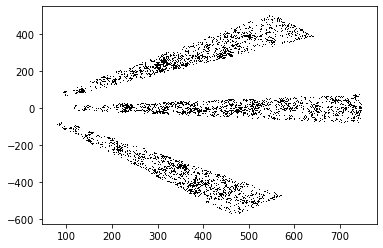

In [61]:
plt.plot(dat['CARTESIAN_X'], dat['CARTESIAN_Y'], c=dat['] marker=',', lw=0.0, c='k')